In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/gdrive


(256, 256)


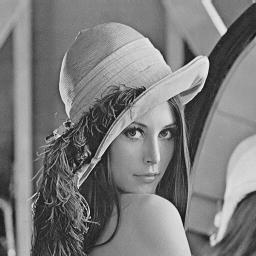

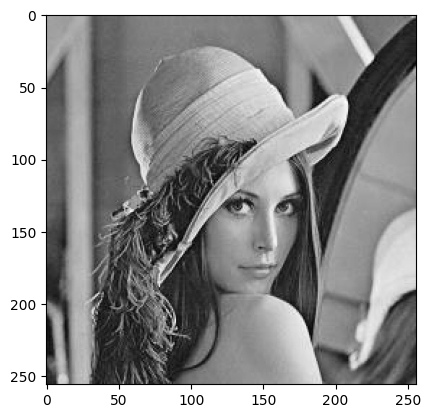

In [3]:
img = cv2.imread('/content/gdrive/My Drive/디지털 영상처리 강의 관련/Images/lena256.jpg')

#print(img.shape)
#cv2_imshow(img)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(RGB_img)

gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gimg.shape)
cv2_imshow(gimg)
plt.imshow(gimg, cmap='gray')

# 영상의 특징 검출 기법
## 로버트 크로스 에지 검출기

In [4]:
# 로버트 크로스 필터
gx = np.array([[-1, 0], [0, 1]], dtype=int)
gy = np.array([[0, -1], [1, 0]], dtype=int)

In [5]:
# 로버트 크로스 컨벌루션
x = cv2.filter2D(gimg, -1, gx) # -1은 입력 영상과 같은 타입, 크기의 영상을 생성
y = cv2.filter2D(gimg, -1, gy)

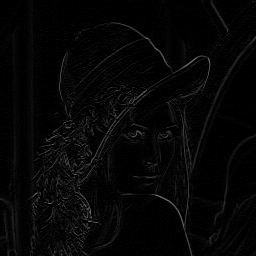

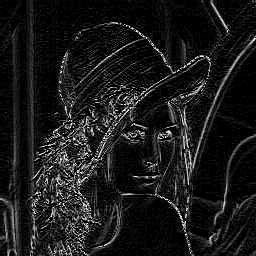

In [6]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
outimg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
cv2_imshow(outimg)
cv2_imshow(outimg*5)

In [7]:
gBin = np.zeros((gimg.shape[0], gimg.shape[1]), dtype=np.ubyte)

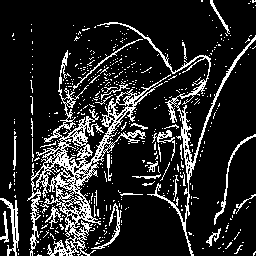

In [8]:
threshold = 10

for h in range(gimg.shape[0]):
    for w in range(gimg.shape[1]):
        if (outimg[h, w] > threshold):
            gBin[h, w] = 255

cv2_imshow(gBin)